In [29]:
foods <- read.csv(file="06.csv",
head=FALSE,sep=",")

nutr <- foods[, 2:ncol(foods)]
V0 <- 1:nrow(foods)
foodswithnum <- cbind(V0, foods)
head(foodswithnum, 35)

V0,V1,V2,V3,V4,V5,V6
1,Braised beef,340,20,28,9,2.6
2,Hamburger,245,21,17,9,2.7
3,Roast beef,420,15,39,7,2.0
4,Beefsteak,375,19,32,9,2.6
5,Canned beef,180,22,10,17,3.7
6,Broiled chicken,115,20,3,8,1.4
7,Canned chicken,170,25,7,12,1.5
8,Beef heart,160,26,5,14,5.9
9,Roast lamb leg,265,20,20,9,2.6
10,Roast lamb shoulder,300,18,25,9,2.3


In [31]:
normalize1 <- function(row) {
    # Calculate mean and standard deviation
    mean_data <- mean(row)
    sd_data <- sd(row)

    # Normalize the data
    return ((row - mean_data) / sd_data)
}
n1 <- apply(nutr, 2, normalize1)
dist1 = dist((apply(nutr, 2, normalize1)), method="minkowski",p=2)
d1_matrix <- as.matrix(dist1)
print(n1)

               V2         V3          V4          V5          V6
 [1,]  1.31010243  0.2352002  1.28972867 -0.44804636  0.14953653
 [2,]  0.37143966  0.4704005  0.31256179 -0.44804636  0.21796850
 [3,]  2.10055530 -0.9408009  2.26689554 -0.47367613 -0.26105530
 [4,]  1.65592556  0.0000000  1.64506208 -0.44804636  0.14953653
 [5,] -0.27080330  0.7056007 -0.30927167 -0.34552727  0.90228821
 [6,] -0.91304625  0.2352002 -0.93110514 -0.46086124 -0.67164712
 [7,] -0.36960990  1.4112014 -0.57577173 -0.40960170 -0.60321515
 [8,] -0.46841651  1.6464016 -0.75343843 -0.38397193  2.40779157
 [9,]  0.56905287  0.2352002  0.57906185 -0.44804636  0.14953653
[10,]  0.91487600 -0.2352002  1.02322861 -0.44804636 -0.05575938
[11,]  1.31010243  0.2352002  1.28972867 -0.44804636  0.08110456
[12,]  1.31010243  0.0000000  1.37856202 -0.44804636  0.08110456
[13,]  1.45831235  0.0000000  1.46739537 -0.44804636  0.01267259
[14,] -0.02378678 -0.2352002  0.04606174 -0.47367613  0.08110456
[15,] -0.22139999  0.9408

In [35]:
normalize2 <- function(row) {
    min_value <- min(row)
    max_value <- max(row)

    # Normalize the data
    return ((row - min_value) / (max_value - min_value))
}
n2 <- apply(nutr, 2, normalize2)
dist2 = dist((apply(nutr, 2, normalize2)), method="minkowski",p=2)
d2_matrix <- as.matrix(dist2)
head(n2)

V2,V3,V4,V5,V6
0.7866667,0.6842105,0.71052632,0.011049724,0.3818182
0.5333333,0.7368421,0.42105263,0.011049724,0.4000000
1.0000000,0.4210526,1.00000000,0.005524862,0.2727273
0.8800000,0.6315789,0.81578947,0.011049724,0.3818182
0.3600000,0.7894737,0.23684211,0.033149171,0.5818182
0.1866667,0.6842105,0.05263158,0.008287293,0.1636364


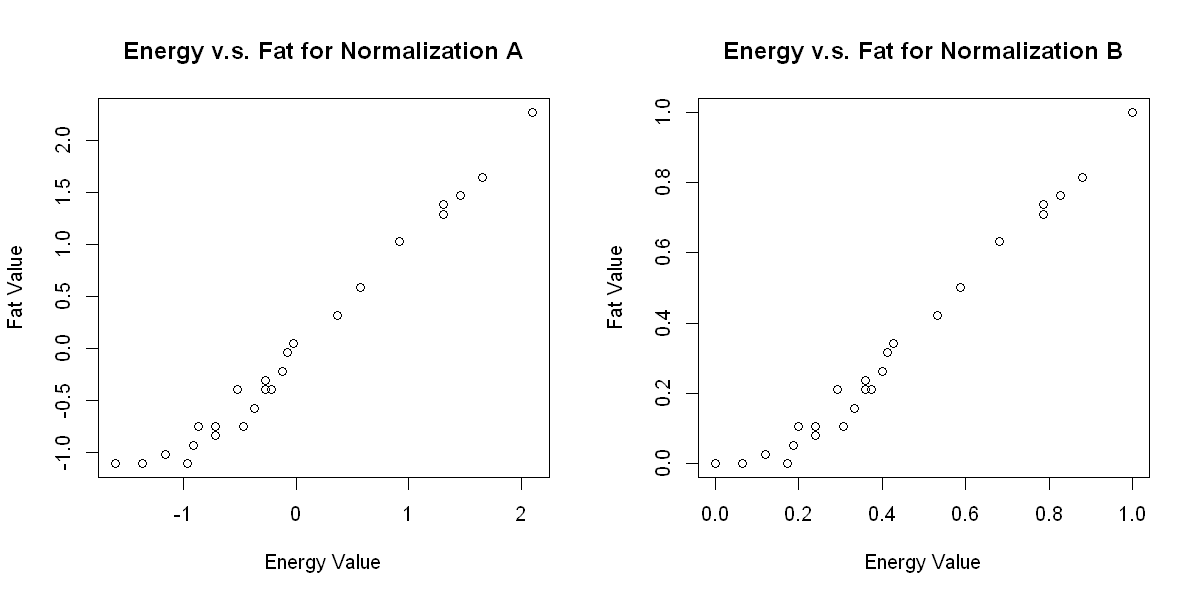

In [40]:
par(mfrow = c(1, 2))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)  #adjust these numbers as needed
plot(n1[, 1], n1[, 3], xlab="Energy Value", ylab="Fat Value")
title("Energy v.s. Fat for Normalization A")
plot(n2[, 1], n2[, 3], xlab="Energy Value", ylab="Fat Value")
title("Energy v.s. Fat for Normalization B")

In [8]:
dist3 = dist(nutr, method="minkowski",p=2)
d3_matrix <- as.matrix(dist3)
head(d3_matrix)

1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0.00000,95.64000,80.93429,35.24202,161.22410,226.39002,171.39489,181.66147,75.42546,40.16329,...,303.57180,253.09334,206.42289,140.87072,237.7113,146.13928,267.2856,392.5927,171.38250,248.11086
95.64000,0.00000,176.49218,130.87784,65.87868,130.76578,75.83825,86.19304,20.24870,55.66112,...,211.38659,158.56737,110.94972,45.43006,173.4757,50.87200,195.6758,363.9424,75.81062,162.49926
80.93429,176.49218,0.00000,45.76418,242.05968,307.16015,252.28803,262.56658,156.25415,120.86807,...,382.92762,333.51528,287.13803,221.57843,305.9837,226.84684,338.0321,433.7617,252.23925,325.40645
35.24202,130.87784,45.76418,0.00000,196.42609,261.61888,206.63061,216.88451,110.65713,75.33319,...,337.99089,288.08721,241.61625,176.08112,266.1628,181.31930,297.0886,408.3222,206.62033,281.28811
161.22410,65.87868,242.05968,196.42609,0.00000,66.06277,12.15895,21.32698,85.98959,121.27226,...,147.59028,93.15262,45.82838,23.85980,142.3573,16.63611,154.3470,350.0035,14.97498,107.44399
226.39002,130.76578,307.16015,261.61888,66.06277,0.00000,55.51585,46.05703,150.96834,186.31911,...,97.18539,39.52670,21.67510,85.64555,154.4447,80.72181,151.1274,364.8934,55.38086,90.21885


In [9]:
model1_1 <-  cmdscale(dist1,k=1)
model1_2 <-  cmdscale(dist1,k=2)
model1_3 <-  cmdscale(dist1,k=3)
model1_4 <-  cmdscale(dist1,k=4)

In [10]:
model2_1 <-  cmdscale(dist2,k=1)
model2_2 <-  cmdscale(dist2,k=2)
model2_3 <-  cmdscale(dist2,k=3)
model2_4 <-  cmdscale(dist2,k=4)

In [11]:
model3_1 <-  cmdscale(dist3,k=1)
model3_2 <-  cmdscale(dist3,k=2)
model3_3 <-  cmdscale(dist3,k=3)
model3_4 <-  cmdscale(dist3,k=4)

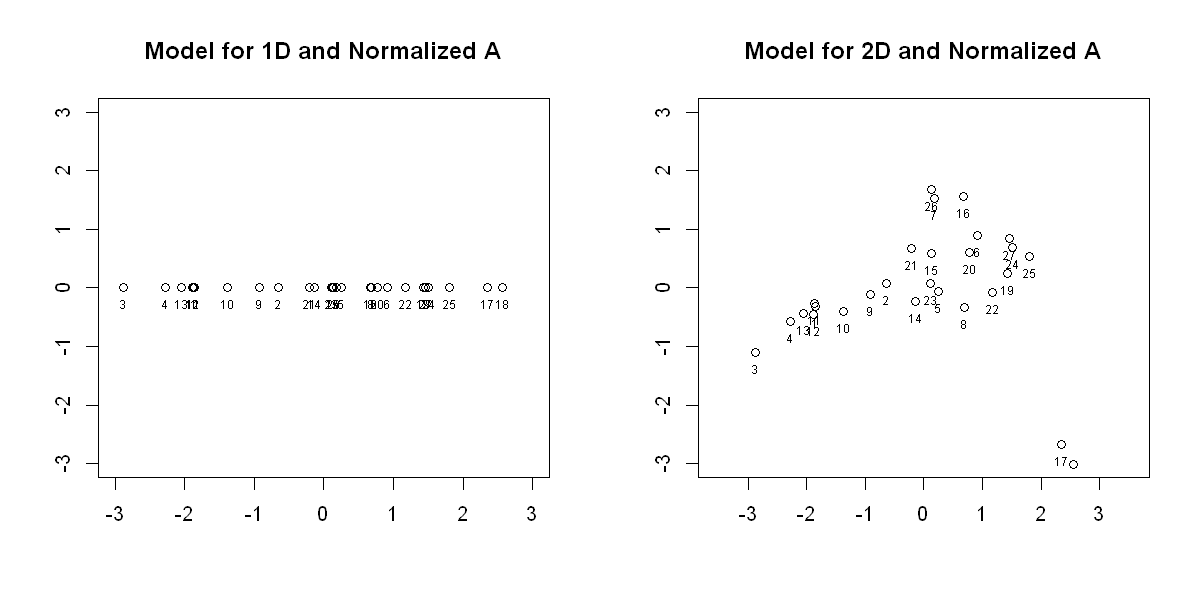

In [24]:
par(mfrow = c(1, 2))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)  #adjust these numbers as needed
plot(model1_1, rep(0, length(model1_1)),xlim=c(-3,3),ylim=c(-3,3), ylab="",xlab="")
text(model1_1, rep(0, length(model1_1)), labels = foodswithnum$V0, pos = 1, cex = 0.6) 
title("Model for 1D and Normalized A")
plot(model1_2, asp=1,xlim=c(-3,3),ylim=c(-3,3), ylab="",xlab="")
text(model1_2, labels = foodswithnum$V0, pos = 1, cex = 0.6) 
title("Model for 2D and Normalized A")

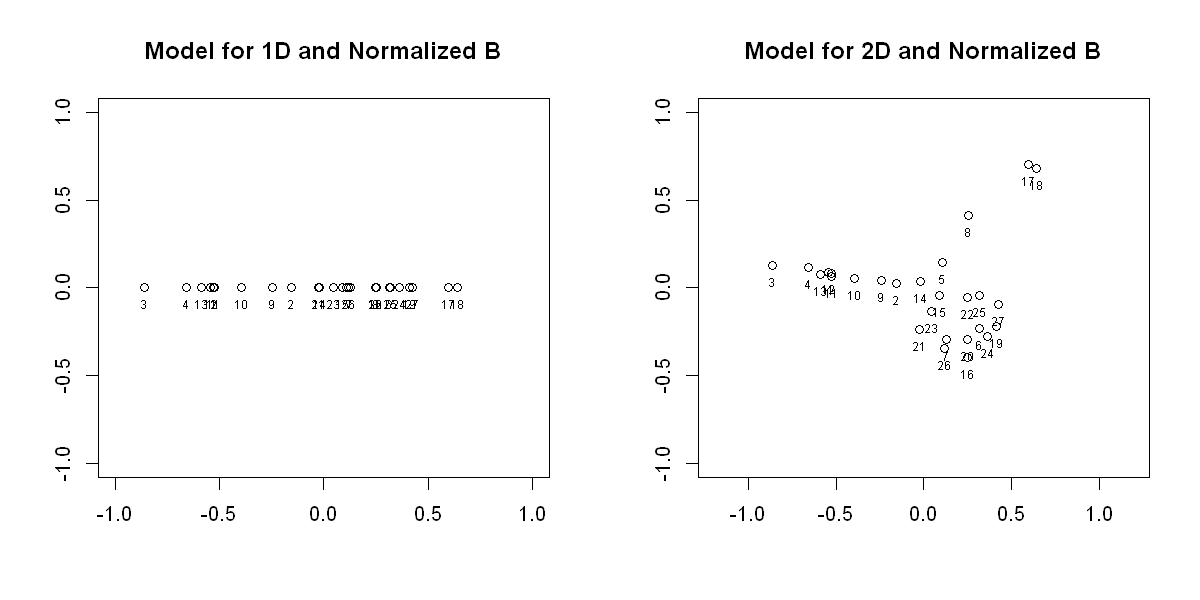

In [25]:
par(mfrow = c(1, 2))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)  #adjust these numbers as needed
plot(model2_1, rep(0, length(model1_1)),xlim=c(-1,1),ylim=c(-1,1), ylab="",xlab="")
text(model2_1, rep(0, length(model1_1)), labels = foodswithnum$V0, pos = 1, cex = 0.6) 
title("Model for 1D and Normalized B")
plot(model2_2, asp=1,xlim=c(-1,1),ylim=c(-1,1), ylab="",xlab="")
text(model2_2, labels = foodswithnum$V0, pos = 1, cex = 0.6) 
title("Model for 2D and Normalized B")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

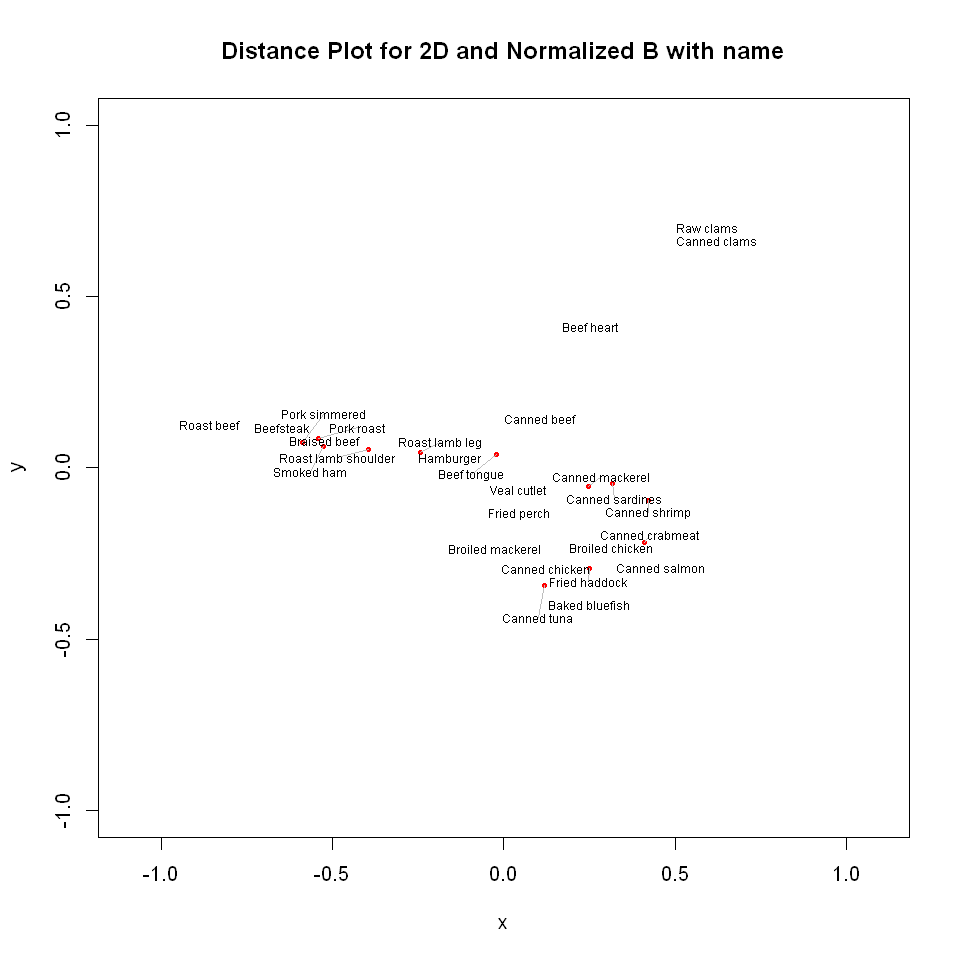

In [73]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)  #adjust these numbers as needed

library(wordcloud)
textplot(model2_2[,1],model2_2[,2],
gsub("(ˆ[ˆ\\s]+\\s{1})","",
foods$V1,perl=TRUE),
asp=1,xlim=c(-1,1),ylim=c(-1,1),
cex=0.6)
title("Modelt for 2D and Normalized B with name")

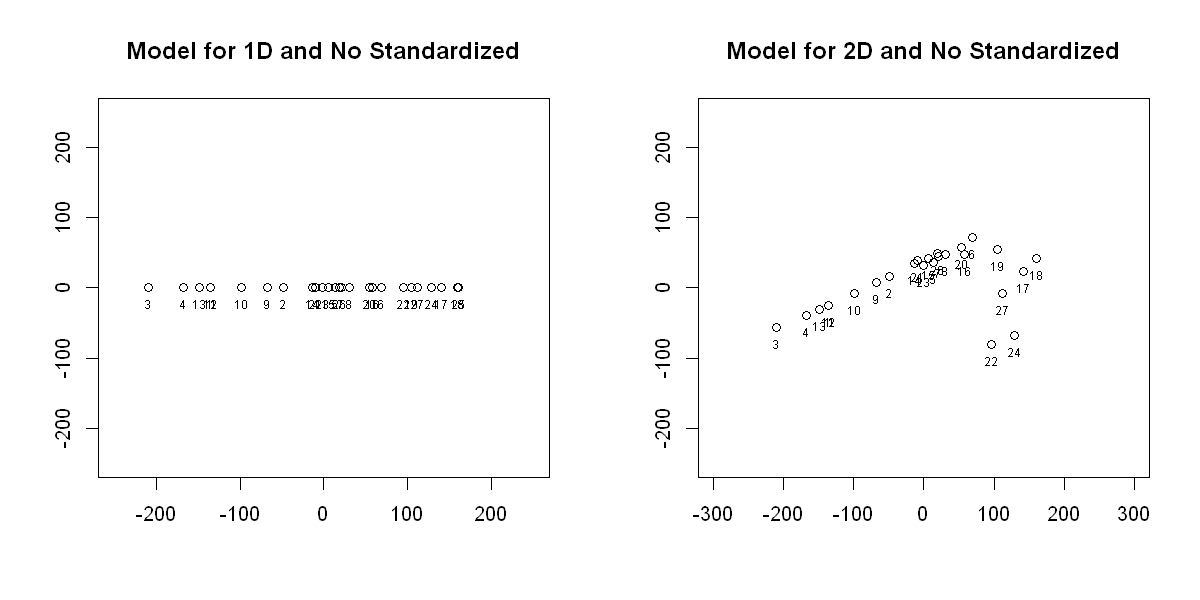

In [28]:
par(mfrow = c(1, 2))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)  #adjust these numbers as needed
plot(model3_1, rep(0, length(model1_1)),xlim=c(-250,250),ylim=c(-250,250), ylab="",xlab="")
text(model3_1, rep(0, length(model1_1)), pos = 1, cex = 0.6) 
title("Model for 1D and No Standardized")
plot(model3_2, asp=1,xlim=c(-250,250),ylim=c(-250,250), ylab="",xlab="")
text(model3_2, labels = foodswithnum$V0, pos = 1, cex = 0.6) 
title("Model for 2D and No Standardized")

 [1]  5.710441e+01  2.979313e+01  2.204055e+01  2.102026e+01  4.164288e-02
 [6]  5.255444e-15  2.289171e-15  2.074379e-15  1.528449e-15  2.067306e-16
[11]  1.893051e-16  1.574130e-16  1.162695e-16 -3.270580e-17 -1.134813e-16
[16] -2.414915e-16 -6.142490e-16 -6.574592e-16 -6.719111e-16 -7.003199e-16
[21] -8.450013e-16 -1.070015e-15 -1.241924e-15 -1.627623e-15 -2.610501e-15
[26] -2.855224e-15 -3.737274e-15


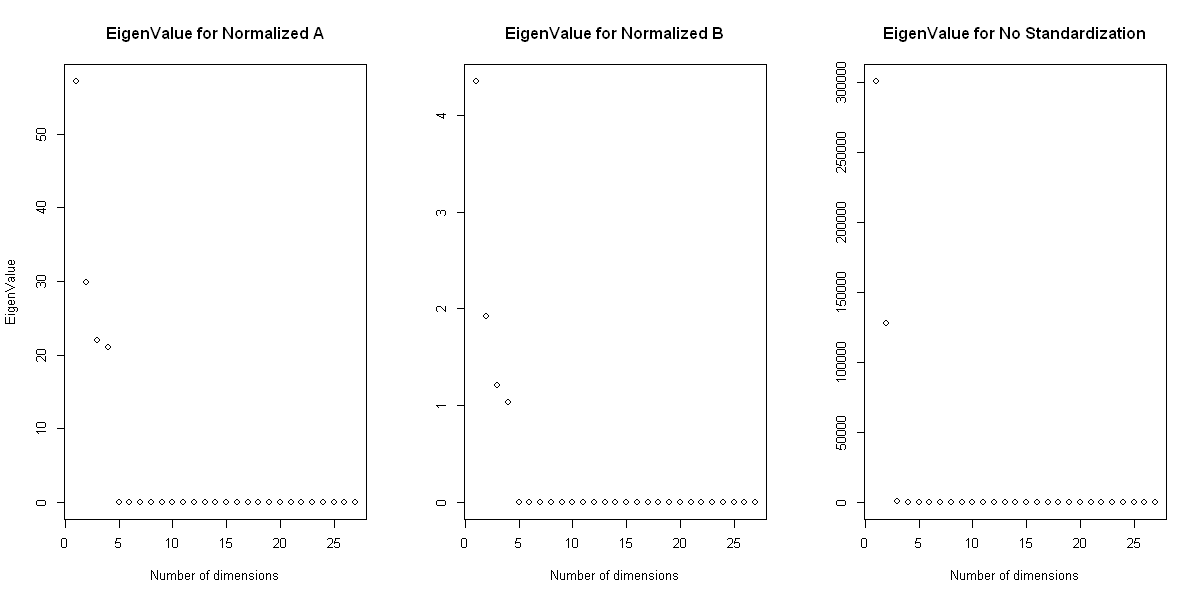

In [99]:
r1 <- cmdscale(dist1, eig=TRUE)
r2 <- cmdscale(dist2, eig=TRUE)
r3 <- cmdscale(dist3, eig=TRUE)

par(mfrow = c(1, 3))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)
plot(r1$eig, xlab="Number of dimensions", ylab="EigenValue")
title("EigenValue for Normalized A")
plot(r2$eig, xlab="Number of dimensions", ylab="")
title("EigenValue for Normalized B")
plot(r3$eig, xlab="Number of dimensions", ylab="")
title("EigenValue for No Standardization")
print(r1$eig)

In [40]:
m1_1 <-  cmdscale(dist1,k=1,eig=TRUE)
m1_2 <-  cmdscale(dist1,k=2,eig=TRUE)
m1_3 <-  cmdscale(dist1,k=3,eig=TRUE)
m1_4 <-  cmdscale(dist1,k=4,eig=TRUE)

m2_1 <-  cmdscale(dist2,k=1,eig=TRUE)
m2_2 <-  cmdscale(dist2,k=2,eig=TRUE)
m2_3 <-  cmdscale(dist2,k=3,eig=TRUE)
m2_4 <-  cmdscale(dist2,k=4,eig=TRUE)

m3_1 <-  cmdscale(dist3,k=1,eig=TRUE)
m3_2 <-  cmdscale(dist3,k=2,eig=TRUE)
m3_3 <-  cmdscale(dist3,k=3,eig=TRUE)
m3_4 <-  cmdscale(dist3,k=4,eig=TRUE)

In [43]:
cat(m1_1$GOF, m1_2$GOF, m1_3$GOF, m1_4$GOF)
print(" ")
cat(m2_1$GOF, m2_2$GOF, m2_3$GOF, m2_4$GOF)
print(" ")
cat(m3_1$GOF, m3_2$GOF, m3_3$GOF, m3_4$GOF)


0.4392647 0.4392647 0.6684426 0.6684426 0.8379853 0.8379853 0.9996797 0.9996797[1] " "
0.5103875 0.5103875 0.735984 0.735984 0.878326 0.878326 0.9996141 0.9996141[1] " "
0.7010328 0.7010328 0.9986136 0.9986136 0.9998531 0.9998531 0.9999786 0.9999786

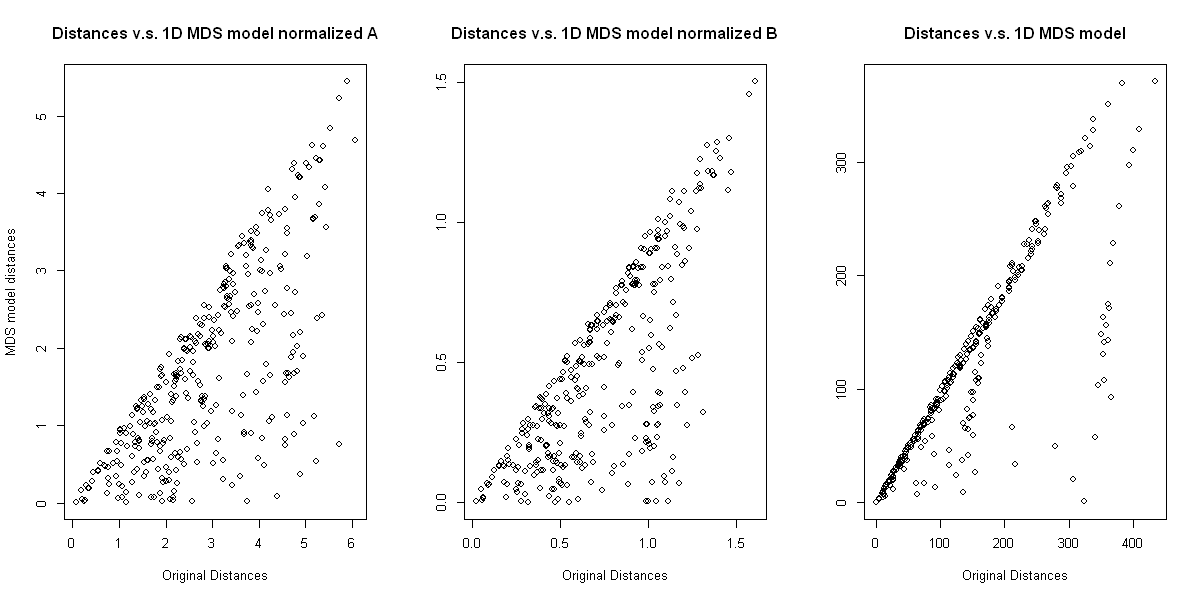

In [88]:
par(mfrow = c(1, 3))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)  #adjust these numbers as needed
plot(dist1, dist(model1_1), xlab="Original Distances", ylab="MDS model distances")
title("Distances v.s. 1D MDS model normalized A")
plot(dist2, dist(model2_1), xlab="Original Distances", ylab="")
title("Distances v.s. 1D MDS model normalized B")
plot(dist3, dist(model3_1), xlab="Original Distances", ylab="")
title("Distances v.s. 1D MDS model")

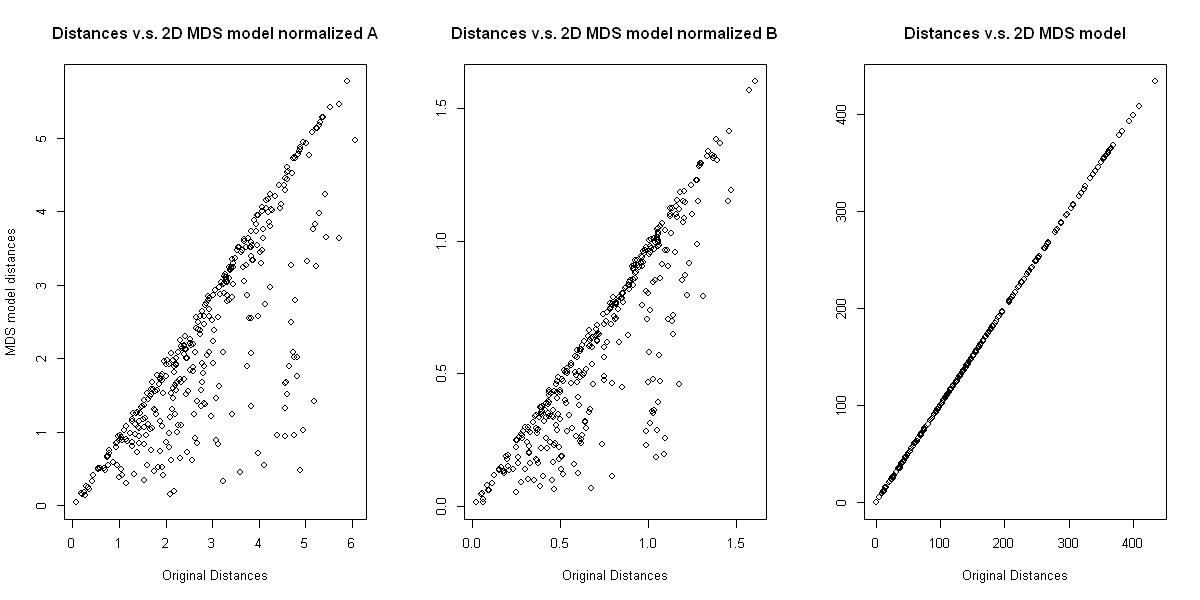

In [89]:
par(mfrow = c(1, 3))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)  #adjust these numbers as needed
plot(dist1, dist(model1_2), xlab="Original Distances", ylab="MDS model distances")
title("Distances v.s. 2D MDS model normalized A")
plot(dist2, dist(model2_2), xlab="Original Distances", ylab="")
title("Distances v.s. 2D MDS model normalized B")
plot(dist3, dist(model3_2), xlab="Original Distances", ylab="")
title("Distances v.s. 2D MDS model")

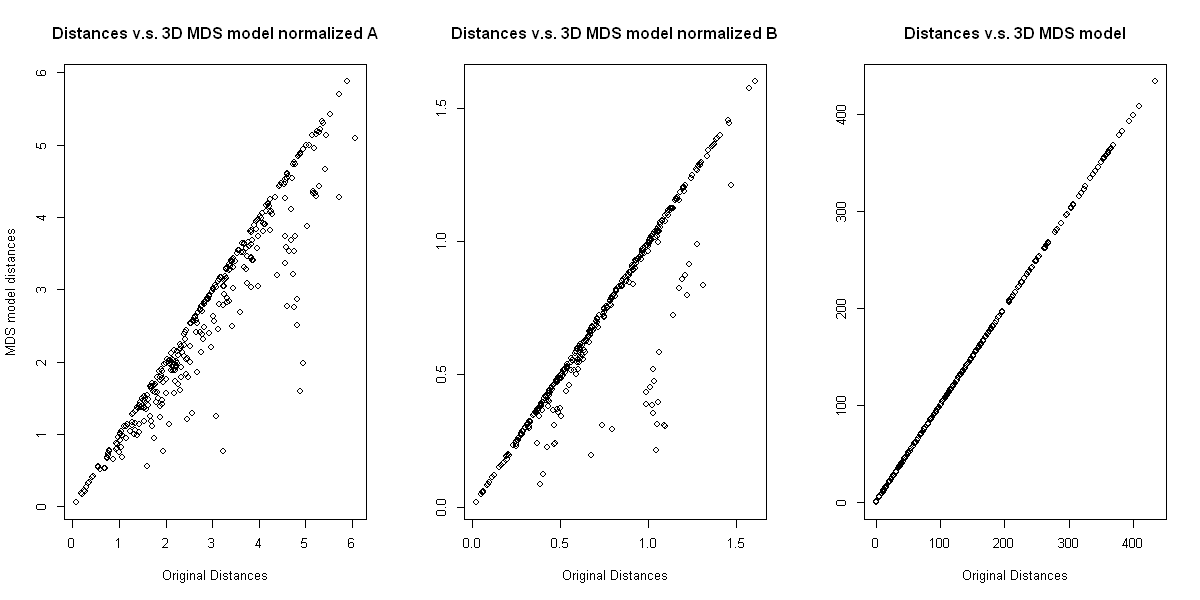

In [90]:
par(mfrow = c(1, 3))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)  #adjust these numbers as needed
plot(dist1, dist(model1_3), xlab="Original Distances", ylab="MDS model distances")
title("Distances v.s. 3D MDS model normalized A")
plot(dist2, dist(model2_3), xlab="Original Distances", ylab="")
title("Distances v.s. 3D MDS model normalized B")
plot(dist3, dist(model3_3), xlab="Original Distances", ylab="")
title("Distances v.s. 3D MDS model")

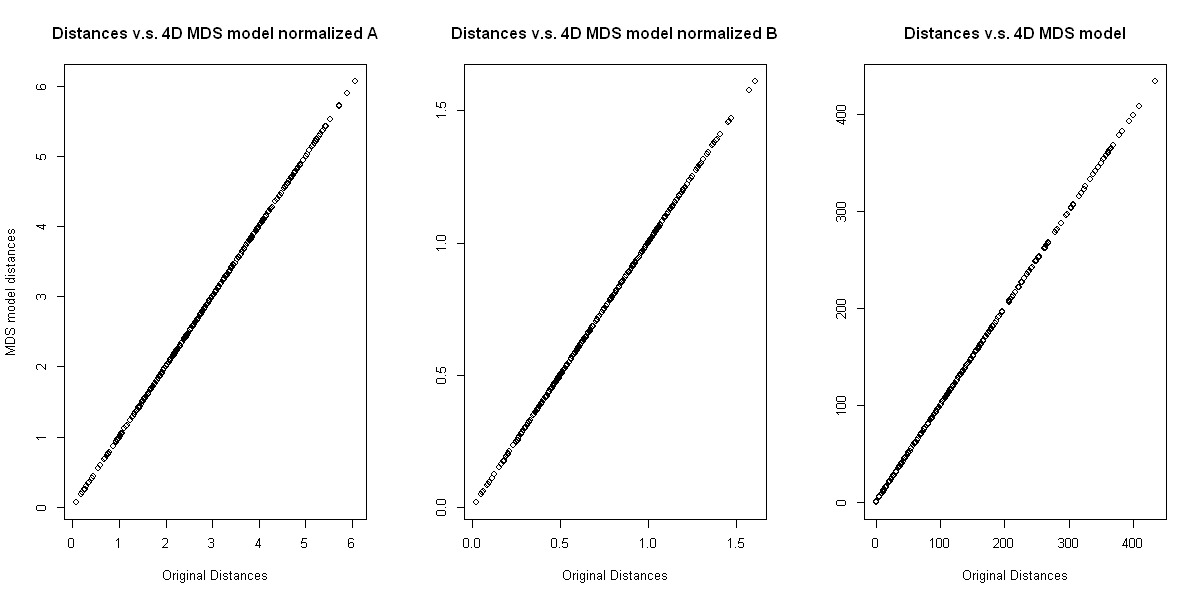

In [41]:
par(mfrow = c(1, 3))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)  #adjust these numbers as needed
plot(dist1, dist(model1_4), xlab="Original Distances", ylab="MDS model distances")
title("Distances v.s. 4D MDS model normalized A")
plot(dist2, dist(model2_4), xlab="Original Distances", ylab="")
title("Distances v.s. 4D MDS model normalized B")
plot(dist3, dist(model3_4), xlab="Original Distances", ylab="")
title("Distances v.s. 4D MDS model")

In [49]:
mean_ab_diff11 <- mean(abs(dist1 - dist(model1_1)))
mean_ab_diff12 <- mean(abs(dist1 - dist(model1_2)))
mean_ab_diff13 <- mean(abs(dist1 - dist(model1_3)))
mean_ab_diff14 <- mean(abs(dist1 - dist(model1_4)))

mean_ab_diff21 <- mean(abs(dist2 - dist(model2_1)))
mean_ab_diff22 <- mean(abs(dist2 - dist(model2_2)))
mean_ab_diff23 <- mean(abs(dist2 - dist(model2_3)))
mean_ab_diff24 <- mean(abs(dist2 - dist(model2_4)))

mean_ab_diff31 <- mean(abs(dist3 - dist(model3_1)))
mean_ab_diff32 <- mean(abs(dist3 - dist(model3_2)))
mean_ab_diff33 <- mean(abs(dist3 - dist(model3_3)))
mean_ab_diff34 <- mean(abs(dist3 - dist(model3_4)))

In [53]:
 mean_ab_diff31

[1] 26.70165

In [56]:
mean_ab_matrix <- matrix(c(mean_ab_diff11, mean_ab_diff21, mean_ab_diff31,
                           mean_ab_diff12, mean_ab_diff22, mean_ab_diff32,
                           mean_ab_diff13, mean_ab_diff23, mean_ab_diff33,
                           mean_ab_diff14, mean_ab_diff24, mean_ab_diff34), ncol = 3, byrow = TRUE)
print(mean_ab_matrix)

             [,1]         [,2]         [,3]
[1,] 1.1414396869 0.2660630563 26.701646285
[2,] 0.6471675520 0.1352886295  0.252588956
[3,] 0.2719369770 0.0557790132  0.039176432
[4,] 0.0007959296 0.0002492284  0.007311173


In [58]:
max_ab_diff11 <- max(abs(dist1 - dist(model1_1)))
max_ab_diff12 <- max(abs(dist1 - dist(model1_2)))
max_ab_diff13 <- max(abs(dist1 - dist(model1_3)))
max_ab_diff14 <- max(abs(dist1 - dist(model1_4)))

max_ab_diff21 <- max(abs(dist2 - dist(model2_1)))
max_ab_diff22 <- max(abs(dist2 - dist(model2_2)))
max_ab_diff23 <- max(abs(dist2 - dist(model2_3)))
max_ab_diff24 <- max(abs(dist2 - dist(model2_4)))
 
max_ab_diff31 <- max(abs(dist3 - dist(model3_1)))
max_ab_diff32 <- max(abs(dist3 - dist(model3_2)))
max_ab_diff33 <- max(abs(dist3 - dist(model3_3)))
max_ab_diff34 <- max(abs(dist3 - dist(model3_4)))

In [60]:
max_ab_matrix <- matrix(c(max_ab_diff11, max_ab_diff21, max_ab_diff31,
                           max_ab_diff12, max_ab_diff22, max_ab_diff32,
                           max_ab_diff13, max_ab_diff23, max_ab_diff33,
                           max_ab_diff14, max_ab_diff24, max_ab_diff34), ncol = 3, byrow = TRUE)
print(max_ab_matrix)

           [,1]        [,2]        [,3]
[1,] 4.96560676 1.113212515 321.8844928
[2,] 4.40348204 0.893576528   2.5496809
[3,] 3.29250189 0.830056600   0.9237251
[4,] 0.01790497 0.006148002   0.2803906


In [61]:
mean_sq_diff11 <- mean((dist1 - dist(model1_1))^2)
mean_sq_diff12 <- mean((dist1 - dist(model1_2))^2)
mean_sq_diff13 <- mean((dist1 - dist(model1_3))^2)
mean_sq_diff14 <- mean((dist1 - dist(model1_4))^2)

mean_sq_diff21 <- mean((dist2 - dist(model2_1))^2)
mean_sq_diff22 <- mean((dist2 - dist(model2_2))^2)
mean_sq_diff23 <- mean((dist2 - dist(model2_3))^2)
mean_sq_diff24 <- mean((dist2 - dist(model2_4))^2)

mean_sq_diff31 <- mean((dist3 - dist(model3_1))^2)
mean_sq_diff32 <- mean((dist3 - dist(model3_2))^2)
mean_sq_diff33 <- mean((dist3 - dist(model3_3))^2)
mean_sq_diff34 <- mean((dist3 - dist(model3_4))^2)

In [62]:
mean_ab_matrix <- matrix(c(mean_ab_diff11, mean_ab_diff21, mean_ab_diff31,
                           mean_ab_diff12, mean_ab_diff22, mean_ab_diff32,
                           mean_ab_diff13, mean_ab_diff23, mean_ab_diff33,
                           mean_ab_diff14, mean_ab_diff24, mean_ab_diff34), ncol = 3, byrow = TRUE)
print(mean_ab_matrix)

             [,1]         [,2]         [,3]
[1,] 1.1414396869 0.2660630563 26.701646285
[2,] 0.6471675520 0.1352886295  0.252588956
[3,] 0.2719369770 0.0557790132  0.039176432
[4,] 0.0007959296 0.0002492284  0.007311173


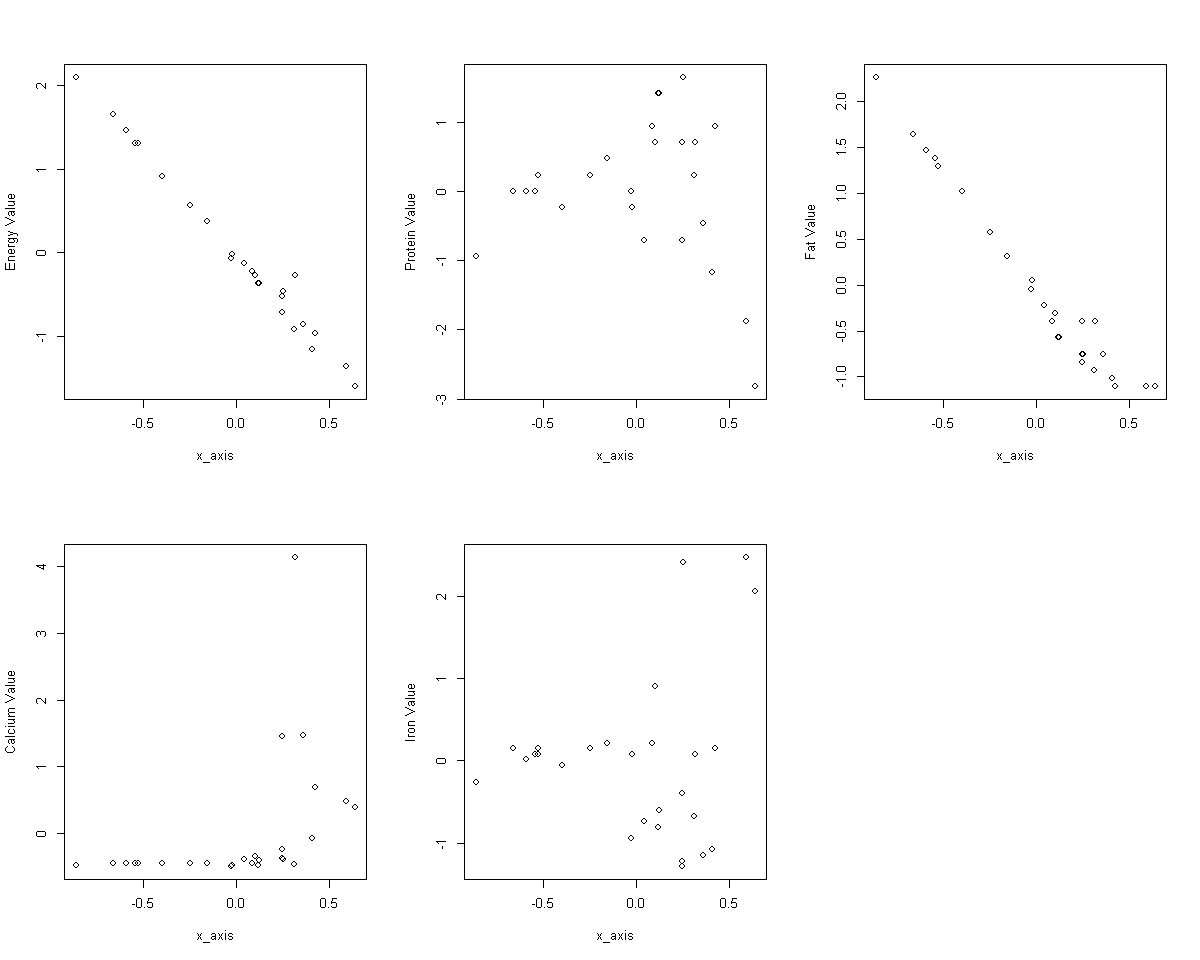

In [67]:
par(mfrow = c(2, 3))
library(repr)
options(repr.plot.width=10, repr.plot.height=8)  #adjust these numbers as needed
plot(model2_2[, 1], n1[, 1], xlab="x_axis", ylab="Energy Value")
plot(model2_2[, 1], n1[, 2], xlab="x_axis", ylab="Protein Value")
plot(model2_2[, 1], n1[, 3], xlab="x_axis", ylab="Fat Value")
plot(model2_2[, 1], n1[, 4], xlab="x_axis", ylab="Calcium Value")
plot(model2_2[, 1], n1[, 5], xlab="x_axis", ylab="Iron Value")


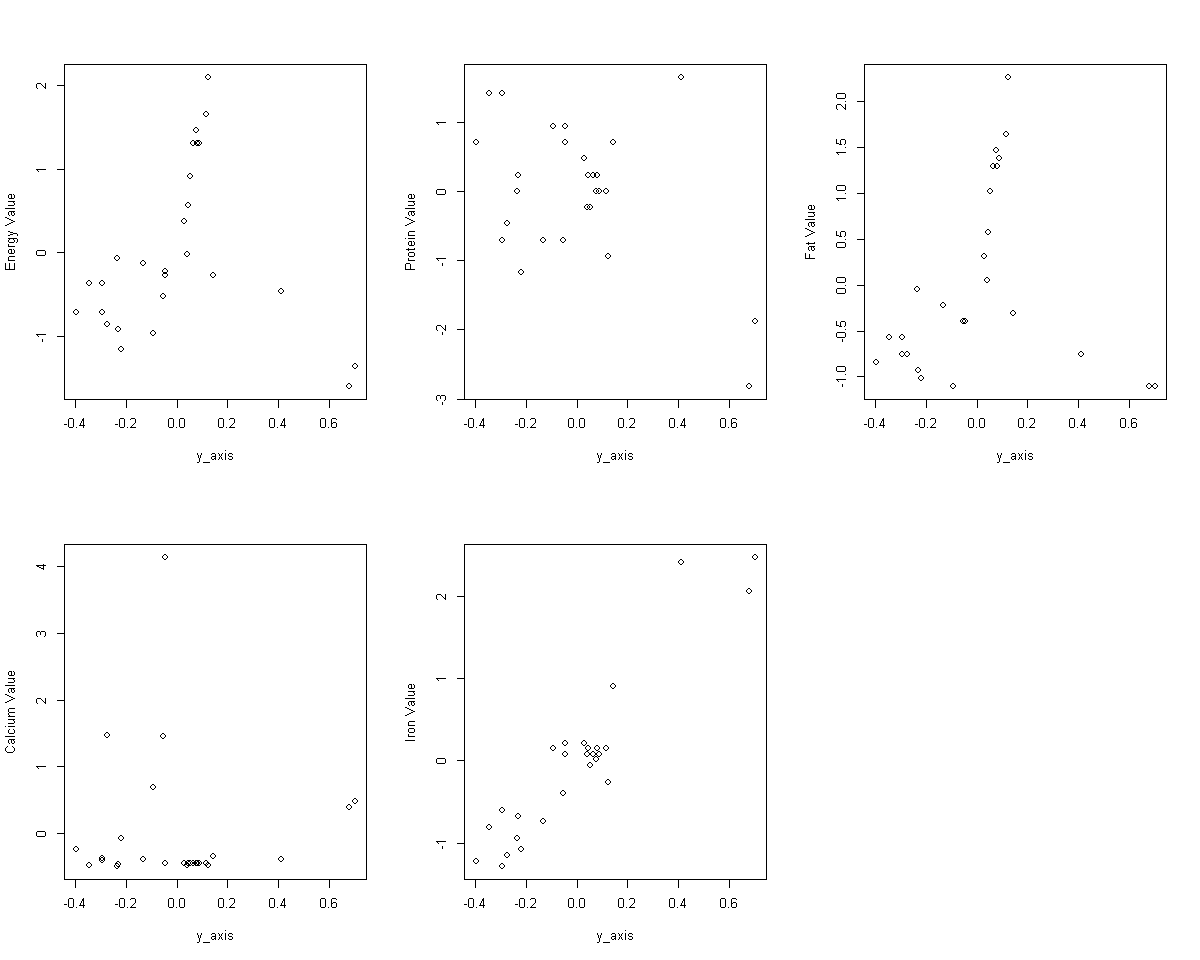

In [68]:
par(mfrow = c(2, 3))
library(repr)
options(repr.plot.width=10, repr.plot.height=8)  #adjust these numbers as needed
plot(model2_2[, 2], n1[, 1], xlab="y_axis", ylab="Energy Value")
plot(model2_2[, 2], n1[, 2], xlab="y_axis", ylab="Protein Value")
plot(model2_2[, 2], n1[, 3], xlab="y_axis", ylab="Fat Value")
plot(model2_2[, 2], n1[, 4], xlab="y_axis", ylab="Calcium Value")
plot(model2_2[, 2], n1[, 5], xlab="y_axis", ylab="Iron Value")

In [71]:
corr1 <- cor(model2_2[, 2], n1[, 1])
corr2 <- cor(model2_2[, 2], n1[, 2])
corr3 <- cor(model2_2[, 2], n1[, 3])
corr4 <- cor(model2_2[, 2], n1[, 4])
corr5 <- cor(model2_2[, 2], n1[, 5])
corr_matrix <- matrix(c(corr1, corr2, corr3, corr4, corr5), ncol = 5, byrow = TRUE)
print(corr_matrix)

           [,1]       [,2]      [,3]       [,4]      [,5]
[1,] 0.04008076 -0.4552143 0.1225704 0.01978941 0.9379603
